**RNNs** : Used for sequential data processing. like languages, where there is a need of saving the memory or history of old data. Codebasics ne better samjhaya hai apne video me.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print("GPU found and being used")
else:
  print("Using CPU")

Using CPU


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.dtype

dtype('uint8')

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
type(y_train)

numpy.ndarray

In [8]:
y_train.shape  # 60,000 1D arrays

(60000,)

In [9]:
x_train[0] # first image out of 60,000 images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
x_train[0].shape # 2D array of 28*28 shape : as expected since grayscale

(28, 28)

In [11]:
y_train[0] # scaler.

5

In [12]:
y_train # 1D array

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
# normalization pixel values between 0 and 1. This is super use of numpy , kaise sare elements pr apply ho jayega

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(None,28)))
model.add(
    layers.SimpleRNN(512, return_sequences=True, activation='relu') # output of this rnn 512 nodes
)
model.add(layers.SimpleRNN(512, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 512)         276992    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 512)               524800    
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 806922 (3.08 MB)
Trainable params: 806922 (3.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), # since upar softmax nhi kiya
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

model.evaluate(x_test, y_test)

Epoch 1/10
938/938 - 46s - loss: 0.3244 - accuracy: 0.9005 - 46s/epoch - 49ms/step
Epoch 2/10
938/938 - 43s - loss: 0.1348 - accuracy: 0.9626 - 43s/epoch - 46ms/step
Epoch 3/10
938/938 - 43s - loss: 0.1150 - accuracy: 0.9693 - 43s/epoch - 46ms/step
Epoch 4/10
938/938 - 43s - loss: 0.1090 - accuracy: 0.9714 - 43s/epoch - 46ms/step
Epoch 5/10
938/938 - 43s - loss: 0.1086 - accuracy: 0.9700 - 43s/epoch - 46ms/step
Epoch 6/10
938/938 - 43s - loss: 0.0807 - accuracy: 0.9776 - 43s/epoch - 46ms/step
Epoch 7/10
938/938 - 43s - loss: 0.0783 - accuracy: 0.9789 - 43s/epoch - 46ms/step
Epoch 8/10
938/938 - 43s - loss: 0.0755 - accuracy: 0.9797 - 43s/epoch - 46ms/step
Epoch 9/10
938/938 - 43s - loss: 0.0795 - accuracy: 0.9780 - 43s/epoch - 46ms/step
Epoch 10/10
938/938 - 43s - loss: 0.0622 - accuracy: 0.9829 - 43s/epoch - 46ms/step
313/313 [==============================] - 3s 7ms/step - loss: 0.1003 - accuracy: 0.9737


[0.10033776611089706, 0.9736999869346619]

Recurrent Neural Networks (RNNs) are a type of neural network designed for sequential data processing. They have a form of memory that allows them to capture information from previous time steps, making them suitable for tasks like natural language processing, speech recognition, and time series prediction.

Now, let's break down the code and the output:

```python
model = keras.Sequential()
```

This creates a sequential model using Keras, a high-level neural networks API. A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

```python
model.add(keras.Input(shape=(None, 28)))
```

This line adds the input layer to the model. The `shape=(None, 28)` indicates that the input has a variable length (None) along the time axis (assuming sequential data) and each time step has 28 features.

The 'None' in the input shape means that the model can handle sequences of variable length. This is useful when working with sequences of different lengths, and the model will automatically adapt to the length of the input sequences during training and inference.

```python
model.add(layers.SimpleRNN(512, return_sequences=True, activation='relu'))
```

This line adds a SimpleRNN layer to the model with 512 units (nodes), the `return_sequences=True` parameter means that this layer returns the full sequence of outputs for each input sequence. The activation function used is ReLU.

```python
model.add(layers.SimpleRNN(512, activation='relu'))
```

This line adds another SimpleRNN layer with 512 units, but without `return_sequences=True`, meaning it only returns the output of the last time step in the sequence.

```python
model.add(layers.Dense(10))
```

This adds a dense (fully connected) layer with 10 units, which is the output layer since the MNIST dataset has 10 classes (digits 0 through 9).

The summary output provides a summary of the model architecture and its parameters:

- "None" in the output shape for SimpleRNN layers signifies that the model can handle variable sequence lengths during training and inference.
- "None" in the input shape also indicates that the model can handle variable sequence lengths.
- "Param #" represents the number of parameters in each layer, which includes weights and biases.

In summary, this code defines a sequential model for processing sequences of 28-dimensional vectors. It uses two SimpleRNN layers with 512 units each and a ReLU activation function, and it concludes with a Dense layer for classification. The model is suitable for tasks like sequence processing and can handle variable-length sequences.

In RNN, default activation function is tanh. If likhoge nhi to tanh will be used

In [ ]:
# USING GRU LAYER INSTEAD OF Simple RNN LAYER, REST EVERYTHING KEEPING SAME
model = keras.Sequential()
model.add(keras.Input(shape=(None,28)))
model.add(
    layers.GRU(512, return_sequences=True, activation='relu') # output of this rnn 512 nodes
)
model.add(layers.GRU(512, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), # since upar softmax nhi kiya
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 512)         832512    
                                                                 
 gru_3 (GRU)                 (None, 512)               1575936   
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2413578 (9.21 MB)
Trainable params: 2413578 (9.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
938/938 - 93s - loss: 0.2875 - accuracy: 0.9026 - 93s/epoch - 99ms/step
Epoch 2/10
938/938 - 89s - loss: 0.0662 - accuracy: 0.9805 - 89s/epoch - 95ms/step
Epoch 3/10
938/938 - 92s - loss: 0.0473 - accuracy: 0.9857 - 92s/epoch - 98ms/step
Epoch 4/10
938/938 - 89s - loss: 0.0381 - accuracy: 0.9884 - 89s/epoch - 95ms/step
Epoch 5/10
938/938 - 89s - loss: 0.0306 - accuracy: 0.9906 - 89s/epoch - 95ms/step
Epoch 6/10
938/938 - 89s - loss: 0.0268 - accuracy: 0.9916 - 89s/epoch - 95ms/step
Epoch 7/10
938/938 - 94s - loss: 0.0219 - accuracy: 0.9930 - 94s/epoch - 100ms/step
Epoch 8/10
938/938 - 91s - loss: 0.0195 - accuracy: 0.9938 - 91s/epoch - 97ms/step
Epoch 9/10
938/938 - 99s - loss: 0.0177 - accuracy: 0.9938 - 99s/epoch - 105ms/step
Epoch 10/10
938/938 - 90s - loss: 0.0153 - accuracy: 0.9949 - 90s/epoch - 96ms/step
313/313 [==============================] - 4s 12ms/step - loss: 0.0328 - accuracy: 0.9912


[0.03284318745136261, 0.9911999702453613]

GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) are advanced types of recurrent neural network (RNN) architectures designed to address the vanishing gradient problem, which is a challenge in training traditional RNNs on long sequences.

### GRU (Gated Recurrent Unit):

GRU is a type of RNN that aims to simplify the architecture of LSTM while maintaining similar performance. It uses gating mechanisms to control the flow of information within the network. The key components of a GRU unit are the update gate and the reset gate, which allow the model to selectively update its memory.

### LSTM (Long Short-Term Memory):

LSTM is another type of RNN that is designed to overcome the vanishing gradient problem by introducing a more complex memory cell structure. LSTM units have three gates: the input gate, the forget gate, and the output gate. These gates control the flow of information, allowing the model to capture long-range dependencies in sequential data.

### Using GRU or LSTM instead of SimpleRNN:

If you replace `layers.SimpleRNN` with `layers.GRU` or `layers.LSTM` in your code, the main difference will be in the complexity of the model's ability to capture long-term dependencies in sequential data.

```python
# Example using GRU
model.add(layers.GRU(512, return_sequences=True, activation='relu'))

# Example using LSTM
model.add(layers.LSTM(512, return_sequences=True, activation='relu'))
```

Both GRU and LSTM layers have more sophisticated mechanisms for handling information over longer sequences compared to SimpleRNN. They are particularly useful when dealing with tasks that involve learning from sequences with long-term dependencies, such as natural language processing, speech recognition, and time series prediction.

In general, LSTMs and GRUs are preferred over SimpleRNN when working with sequential data due to their improved ability to capture and remember long-term dependencies, making them more suitable for complex tasks. However, the choice between GRU and LSTM often depends on the specific characteristics of the data and the task at hand.

In [ ]:
# USING LSTM LAYER INSTEAD OF Simple RNN LAYER, REST EVERYTHING KEEPING SAME
model = keras.Sequential()
model.add(keras.Input(shape=(None,28)))
model.add(
    layers.LSTM(512, return_sequences=True, activation='relu') # output of this rnn 512 nodes
)
model.add(layers.LSTM(512, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), # since upar softmax nhi kiya
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 512)         1107968   
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3212298 (12.25 MB)
Trainable params: 3212298 (12.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
938/938 - 73s - loss: 0.4506 - accuracy: 0.8543 - 73s/epoch - 78ms/step
Epoch 2/10
938/938 - 71s - loss: 0.0926 - accuracy: 0.9732 - 71s/epoch - 75ms/step
Epoch 3/10
938/938 - 89s - loss: 0.0639 - accuracy: 0.9804 - 89s/epoch - 95ms/step
Epoch 4/10
938/938 - 69s - loss: 0.0502 - accuracy: 0.9849 - 69s/epoch - 74ms/step
Epoch 5/10
938/938 - 70s - loss: 0.0407 - accuracy: 0.9875 - 70s/epoch - 75ms/step
Epoch 6/10
938/938 - 72s - loss: 0.0343 - accuracy: 0.9892 - 72s/epoch - 77ms/step
Epoch 7/10
938/938 - 78s - loss: 0.0308 - accuracy: 0.9908 - 78s/epoch - 84ms/step
Epoch 8/10
938/938 - 69s - loss: 0.0271 - accuracy: 0.9919 - 69s/epoch - 74ms/step
Epoch 9/10
938/938 - 70s - loss: 0.0227 - accuracy: 0.9931 - 70s/epoch - 75ms/step
Epoch 10/10
938/938 - 77s - loss: 0.0228 - accuracy: 0.9930 - 77s/epoch - 82ms/step
313/313 [==============================] - 4s 10ms/step - loss: 0.0356 - accuracy: 0.9895


[0.03560495376586914, 0.9894999861717224]

In [ ]:
# USING LSTM LAYER + Bidirectional(one gonna forward one gonna backword) INSTEAD OF Simple RNN LAYER, REST EVERYTHING KEEPING SAME
model = keras.Sequential()
model.add(keras.Input(shape=(None,28)))
model.add(
    layers.Bidirectional(
        layers.LSTM(512, return_sequences=True, activation='relu') # output of this rnn 512*2 = 1024 nodes, since bidirectional hai
    )
)
model.add(layers.LSTM(512, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), # since upar softmax nhi kiya
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

model.evaluate(x_test, y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, None, 1024)        2215936   
 al)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 512)               3147776   
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5368842 (20.48 MB)
Trainable params: 5368842 (20.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
938/938 - 106s - loss: 0.4543 - accuracy: 0.8519 - 106s/epoch - 113ms/step
Epoch 2/10
938/938 - 103s - loss: 0.0928 - accuracy: 0.9727 - 103s/epoch - 110ms/step
Epoch 3/10
938/938 - 102s - loss: 0

[0.04023962467908859, 0.9879999756813049]

Bidirectional RNNs (Recurrent Neural Networks) are a type of RNN architecture that processes input data in both forward and backward directions. In traditional (unidirectional) RNNs, information flows only from the past to the future, but bidirectional RNNs allow the model to consider information from both the past and the future at each time step.

The idea behind bidirectionality is to capture dependencies in both directions, which can be particularly useful in tasks where context from both past and future information is important. Examples of such tasks include natural language processing, where understanding the context of a word may depend on both preceding and succeeding words.

In a bidirectional RNN, the hidden state at each time step is computed by considering both the information from the past (forward direction) and the future (backward direction). This is achieved by having two separate sets of hidden states: one set computed from the forward pass and the other from the backward pass. The final hidden state at each time step is typically a concatenation of the forward and backward hidden states.

Here is a simplified example of how a bidirectional RNN is implemented using Keras:

```python
from tensorflow.keras.layers import Bidirectional, LSTM

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(None, 28)))
model.add(Dense(10, activation='softmax'))
```

In this example, a Bidirectional wrapper is applied to an LSTM layer. The `return_sequences=True` parameter indicates that the LSTM layer should return the full sequence of outputs, and the Bidirectional wrapper ensures that the input sequence is processed in both forward and backward directions.

Bidirectional RNNs are beneficial when the context from both directions is relevant to the task. They can capture more complex patterns and dependencies in sequential data, making them suitable for various applications, such as machine translation, sentiment analysis, and named entity recognition. However, they also come with a higher computational cost compared to unidirectional RNNs.

# More in depth Example on Functional API

**Multi digit dataset** (Multi digits MNIST)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist

In [ ]:
import pandas as pd

Sequential can only map one input to one output. But now we are gonna have two outputs.(as 2 digits in a number)

Extracting a zip file using python.

In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/multi_digit_mnist.zip'
extraction_path = '/content/multi_digit_mnist'

# Check if the extraction directory already exists
if not os.path.exists(extraction_path):
    # Create the extraction directory if it doesn't exist
    os.makedirs(extraction_path)

    # Extract the contents of the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)

    print(f"Extracted {zip_file_path} to {extraction_path}")
else:
    print(f"The file at {extraction_path} already exists.")


Extracted /content/drive/MyDrive/multi_digit_mnist.zip to /content/multi_digit_mnist


In [ ]:
# List the contents of the extraction directory
contents = os.listdir(extraction_path)
print(f"Contents of {extraction_path}:")
for item in contents:
    print(item)

Contents of /content/multi_digit_mnist:
test_images
test.csv
train_images
train.csv


Checking the number of files in a directory.

In [ ]:
import os

directory_path = '/content/multi_digit_mnist/test_images'

# List all items in the directory
all_items = os.listdir(directory_path)

# Initialize a count variable
file_count = 0

print(len(all_items))

# Iterate through all items and count files
for item in all_items:
    # Check if the item is a file
    if os.path.isfile(os.path.join(directory_path, item)):
        file_count += 1

print(f"The number of files in the directory {directory_path} is: {file_count}")


20000
The number of files in the directory /content/multi_digit_mnist/test_images is: 20000


In [ ]:
import os

directory_path = '/content/multi_digit_mnist/train_images'

# List all items in the directory
all_items = os.listdir(directory_path)

# Initialize a count variable
file_count = 0

print(len(all_items))

# Iterate through all items and count files
for item in all_items:
    # Check if the item is a file
    if os.path.isfile(os.path.join(directory_path, item)):
        file_count += 1

print(f"The number of files in the directory {directory_path} is: {file_count}")


64000
The number of files in the directory /content/multi_digit_mnist/train_images is: 64000


In [ ]:
train_df = pd.read_csv("/content/multi_digit_mnist/train.csv")
test_df = pd.read_csv("/content/multi_digit_mnist/test.csv")

In [ ]:
train_df.shape

(64000, 3)

In [ ]:
test_df.shape

(20000, 3)

In [ ]:
train_df.head() # so see image 2 digits ki hai, jiske labels are given in 2 coulumns

,Image,first_num,second_num
0,0_00.png,0,0
1,100_00.png,0,0
2,101_00.png,0,0
3,102_00.png,0,0
4,103_00.png,0,0


In [ ]:
test_df.tail()

,Image,first_num,second_num
19995,997_96.png,9,6
19996,998_96.png,9,6
19997,999_96.png,9,6
19998,99_96.png,9,6
19999,9_96.png,9,6


Let's open some image, check their properties present in some directory using python.

In [ ]:
# 1. Using PIL

from PIL import Image, ImageShow
import os

image_path = '/content/multi_digit_mnist/train_images/0_04.png'  # Replace with your image file path

# Open the image
img = Image.open(image_path)

# Get image properties
image_format = img.format
image_mode = img.mode
image_size = img.size

# Display the image
img.show()

# Print the properties
print(f"Image format: {image_format}")
print(f"Image mode: {image_mode}")
print(f"Image size: {image_size}")

Image format: PNG
Image mode: L
Image size: (64, 64)


The output you provided indicates the properties of the image you loaded using PIL (Pillow):

- `Image format: PNG`: This tells you that the format of the image is PNG.
- `Image mode: L`: The mode 'L' stands for "Luminance," which means the image is grayscale (single-channel).
- `Image size: (64, 64)`: The size of the image is 64 pixels by 64 pixels.

Regarding the issue with not being able to see the image using `img.show()`, when working in certain environments, such as Google Colab or some Jupyter notebooks, the `show()` method may not display the image as expected. Instead, you can use Matplotlib to display the image:

```python
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/multi_digit_mnist/train_images/0_04.png'  # Replace with your image file path

# Open the image
img = Image.open(image_path)

# Get image properties
image_format = img.format
image_mode = img.mode
image_size = img.size

# Display the image using Matplotlib
plt.imshow(img, cmap='gray')  # Assuming it's a grayscale image
plt.axis('off')  # Turn off axis labels
plt.show()

# Print the properties
print(f"Image format: {image_format}")
print(f"Image mode: {image_mode}")
print(f"Image size: {image_size}")
```

This code uses Matplotlib to display the image. The `plt.imshow()` function is used to show the image, and `plt.axis('off')` is used to turn off axis labels. Make sure you have Matplotlib installed (`pip install matplotlib`) if you haven't already. This should display the image in your environment.

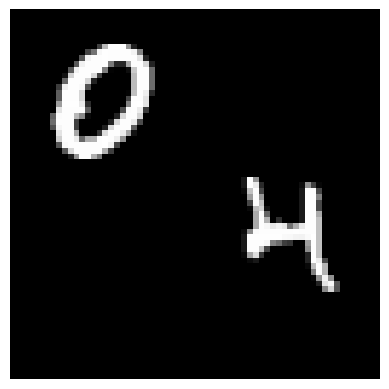

Image format: PNG
Image mode: L
Image size: (64, 64)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/multi_digit_mnist/train_images/0_04.png'  # Replace with your image file path

# Open the image
img = Image.open(image_path)

# Get image properties
image_format = img.format
image_mode = img.mode
image_size = img.size

# Display the image using Matplotlib
plt.imshow(img, cmap='gray')  # Assuming it's a grayscale image
plt.axis('off')  # Turn off axis labels
plt.show()

# Print the properties
print(f"Image format: {image_format}")
print(f"Image mode: {image_mode}")
print(f"Image size: {image_size}")


For RGB, image mode = RGB

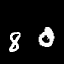

Image width: 64
Image height: 64
Number of channels: 3


In [ ]:
# Using cv2 doing the same

import cv2
import os

image_path = '/content/multi_digit_mnist/test_images/143_80.png'  # Replace with your image file path

# Read the image
img = cv2.imread(image_path)

# Get image properties
image_height, image_width, image_channels = img.shape

# Display the image
# cv2.imshow('Image', img) # won't work in colab
from google.colab.patches import cv2_imshow as show_image
show_image(img) # also arguments 2 ki jagah 1 hi lagega.
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the properties
print(f"Image width: {image_width}")
print(f"Image height: {image_height}")
print(f"Number of channels: {image_channels}") # will show 3, altough it is 1 only. As by default cv2 assumes BGR image

# yhan matplotlib ka use nhi hua show krne me, as colab ne alag function diya hai cv2_imshow()

The discrepancy between the reported number of channels in PIL (Pillow) and OpenCV might be due to how the image is encoded or saved.

When you open an image using OpenCV (`cv2.imread()`), OpenCV may interpret a single-channel (grayscale) image as having three channels. This is because OpenCV loads images in BGR (Blue, Green, Red) order by default, and it assumes that even a grayscale image has three channels (though the values in each channel are the same).

Here's how you can check and print the number of channels using OpenCV:

```python
import cv2

image_path = '/content/multi_digit_mnist/test_images/143_80.png'  # Replace with your image file path

# Read the image
img = cv2.imread(image_path)

# Get image properties
image_height, image_width, image_channels = img.shape

# Print the properties
print(f"Image width: {image_width}")
print(f"Image height: {image_height}")
print(f"Number of channels: {image_channels}")
```

If the reported number of channels is 3, it means OpenCV is treating the image as a BGR image, even if it's grayscale. You can use `cv2.cvtColor()` to convert it explicitly to grayscale:

```python
# Convert BGR image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```

Now, `gray_img` will be a true grayscale image, and `cv2.imshow()` will display it correctly:

```python
# Display the grayscale image
cv2.imshow('Gray Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

This should help you handle grayscale images consistently in OpenCV.

In [ ]:
from PIL import Image, ImageShow
import os

image_path = '/content/multi_digit_mnist/test_images/143_80.png'  # Replace with your image file path

# Open the image
img = Image.open(image_path)

# Get image properties
image_format = img.format
image_mode = img.mode # this shows L for the same image cv2, says 3 channels, because cv2 assumes by default 3 channels : BGR
image_size = img.size


# Print the properties
print(f"Image format: {image_format}")
print(f"Image mode: {image_mode}")
print(f"Image size: {image_size}")

Image format: PNG
Image mode: L
Image size: (64, 64)


In [ ]:
os.getcwd() # pwd deta hai bs

'/content'

So kafi visulaizations to revise ho gye.

In [ ]:
train_df.head()

,Image,first_num,second_num
0,0_00.png,0,0
1,100_00.png,0,0
2,101_00.png,0,0
3,102_00.png,0,0
4,103_00.png,0,0


In [ ]:
test_df.head()

,Image,first_num,second_num
0,0_02.png,0,2
1,100_02.png,0,2
2,101_02.png,0,2
3,102_02.png,0,2
4,103_02.png,0,2


In [ ]:
train_df.iloc[:,0] # all rows , but 0th column only

0          0_00.png
1        100_00.png
2        101_00.png
3        102_00.png
4        103_00.png
            ...    
63995    997_98.png
63996    998_98.png
63997    999_98.png
63998     99_98.png
63999      9_98.png
Name: Image, Length: 64000, dtype: object

In [ ]:
train_df.iloc[:,1] # all rows but first column(index wise) only

0        0
1        0
2        0
3        0
4        0
        ..
63995    9
63996    9
63997    9
63998    9
63999    9
Name: first_num, Length: 64000, dtype: int64

In [ ]:
train_df.iloc[:,2] # all rors and second column only

0        0
1        0
2        0
3        0
4        0
        ..
63995    8
63996    8
63997    8
63998    8
63999    8
Name: second_num, Length: 64000, dtype: int64

these train_df.iloc[:,0] , train_df.iloc[:,1] and train_df.iloc[:,2] all are pandas dataframe

In [ ]:
train_df.iloc[:,0].values

array(['0_00.png', '100_00.png', '101_00.png', ..., '999_98.png',
       '99_98.png', '9_98.png'], dtype=object)

it is now numpy array. Juct .values() badha dene ka kamal

In [ ]:
train_df.iloc[:,1].values # full column is now converted into a 1D list, more accuratlt 1D numpy array

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
train_df.iloc[:,1:] # all rows, and all the columns from index 1

,first_num,second_num
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
63995,9,8
63996,9,8
63997,9,8
63998,9,8


In [ ]:
train_df.iloc[:,1:].values # each label of image is now in form of separate 1D array, with all the values of a row into a separate 1D array

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [9, 8],
       [9, 8],
       [9, 8]])

In [ ]:
test_df.iloc[:,1:]

,first_num,second_num
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
19995,9,6
19996,9,6
19997,9,6
19998,9,6


In [ ]:
test_df.iloc[:,1:].values # kya badhiya tarika hai, pura row as numpy array me pane ka

array([[0, 2],
       [0, 2],
       [0, 2],
       ...,
       [9, 6],
       [9, 6],
       [9, 6]])

In [ ]:
train_labels = train_df.iloc[:,1:].values
test_labels = test_df.iloc[:,1:].values

In [ ]:
print(train_labels)

[[0 0]
 [0 0]
 [0 0]
 ...
 [9 8]
 [9 8]
 [9 8]]


In [ ]:
print(test_labels)

[[0 2]
 [0 2]
 [0 2]
 ...
 [9 6]
 [9 6]
 [9 6]]


In [ ]:
train_images = "/content/multi_digit_mnist/train_images/" + train_df.iloc[:,0].values
test_images = "/content/multi_digit_mnist/test_images/" + test_df.iloc[:,0].values
# it will do for all the rows and 1st column(index 0 column) of the train_df, test_df

In [ ]:
train_images

array(['/content/multi_digit_mnist/train_images/0_00.png',
       '/content/multi_digit_mnist/train_images/100_00.png',
       '/content/multi_digit_mnist/train_images/101_00.png', ...,
       '/content/multi_digit_mnist/train_images/999_98.png',
       '/content/multi_digit_mnist/train_images/99_98.png',
       '/content/multi_digit_mnist/train_images/9_98.png'], dtype=object)

In [ ]:
test_images

array(['/content/multi_digit_mnist/test_images/0_02.png',
       '/content/multi_digit_mnist/test_images/100_02.png',
       '/content/multi_digit_mnist/test_images/101_02.png', ...,
       '/content/multi_digit_mnist/test_images/999_96.png',
       '/content/multi_digit_mnist/test_images/99_96.png',
       '/content/multi_digit_mnist/test_images/9_96.png'], dtype=object)

kya badiya tarika hai, kisi list ki sari strings me koi common line add karke, un sbko ek new list me store karne ka.

In [ ]:
# Hyperparameters
BATCH_SIZE = 64
WEIGHT_DECAY = 0.001
LEARNING_RATE = 0.001

In [ ]:
def read_image(image_path, label):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_image(image, channels=1,dtype=tf.float32)

  labels = {"first_num":label[0], "second_num":label[1]}
  return image, labels

Loading the data

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

train_dataset = (
    train_dataset.shuffle(buffer_size=len(train_labels))
    .map(read_image)
    .batch(batch_size=BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)


`AUTOTUNE = tf.data.experimental.AUTOTUNE` =  TensorFlow will try to automatically tune the buffer size to balance the trade-off between CPU and GPU utilization, leading to more efficient data loading and training.

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_dataset = (
    test_dataset   # no need of shuffling in test
    .map(read_image)
    .batch(batch_size=BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)

Certainly! This code is creating TensorFlow datasets for training and testing a neural network. Let's break down the key components:

### Hyperparameters:

```python
BATCH_SIZE = 64
WEIGHT_DECAY = 0.001
LEARNING_RATE = 0.001
```

These are hyperparameters that control the behavior of the training process:

- `BATCH_SIZE`: The number of samples in each mini-batch during training.
- `WEIGHT_DECAY`: A regularization term to penalize large weights in the neural network.
- `LEARNING_RATE`: The rate at which the model's weights are updated during training.

### Reading Images:

```python
def read_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=1, dtype=tf.float32)

    labels = {"first_num": label[0], "second_num": label[1]}
    return image, labels
```

This function `read_image` takes an image file path and its corresponding label as input and performs the following operations:

- `tf.io.read_file(image_path)`: Reads the contents of the image file.
- `tf.image.decode_image(image, channels=1, dtype=tf.float32)`: Decodes the image into a tensor with one channel (assuming grayscale) and converts the pixel values to floating-point numbers.
- `labels = {"first_num": label[0], "second_num": label[1]}`: Creates a dictionary of labels for the first and second numbers.

### Creating TensorFlow Datasets:

```python
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

train_dataset = (
    train_dataset.shuffle(buffer_size=len(train_labels))
    .map(read_image)
    .batch(batch_size=BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = (
    test_dataset
    .map(read_image)
    .batch(batch_size=BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)
```

1. `tf.data.Dataset.from_tensor_slices((train_images, train_labels))`: Creates a TensorFlow dataset from the given image paths (`train_images`) and labels (`train_labels`).

2. `train_dataset.shuffle(buffer_size=len(train_labels))`: Shuffles the training dataset. The buffer size determines the number of elements from the dataset from which the new dataset is randomly sampled.

3. `.map(read_image)`: Applies the `read_image` function to each element of the dataset. This function reads and decodes the images.

4. `.batch(batch_size=BATCH_SIZE)`: Batches the dataset into mini-batches of size `BATCH_SIZE`.

5. `.prefetch(buffer_size=AUTOTUNE)`: Prefetches data from the dataset to improve training performance by overlapping data loading and model training.

The same steps are repeated for the test dataset (`test_dataset`). The final result is two TensorFlow datasets ready for training and testing a neural network.

In [ ]:
# model building, training and compilation : functional model, more than one output streams

inputs = keras.Input(shape=(64, 64, 1))
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    padding="same",
    kernel_regularizer=regularizers.l2(WEIGHT_DECAY), # regularization is for reducing overfitting
)(inputs)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.Conv2D(64, 3, kernel_regularizer=regularizers.l2(WEIGHT_DECAY),)(x)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(
    64, 3, activation="relu", kernel_regularizer=regularizers.l2(WEIGHT_DECAY),
)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
# now input x is going to be mapped to 2 different outputs : that's why functional api is more useful.
output1 = layers.Dense(10, activation="softmax", name="first_num")(x)
output2 = layers.Dense(10, activation="softmax", name="second_num")(x)
model = keras.Model(inputs=inputs, outputs=[output1, output2])

model.compile(
    optimizer=keras.optimizers.Adam(LEARNING_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(), # by default from_logits = False , as activation softmax upar use kr liay hai output layers me, also single loss function se dono outputs ho gye
    metrics=["accuracy"],
)

model.fit(train_dataset, epochs=5, verbose=2)
model.evaluate(test_dataset, verbose=2)


Epoch 1/5
1000/1000 - 39s - loss: 1.8015 - first_num_loss: 0.8469 - second_num_loss: 0.8682 - first_num_accuracy: 0.7028 - second_num_accuracy: 0.6919 - 39s/epoch - 39ms/step
Epoch 2/5
1000/1000 - 31s - loss: 0.5294 - first_num_loss: 0.2335 - second_num_loss: 0.2283 - first_num_accuracy: 0.9242 - second_num_accuracy: 0.9249 - 31s/epoch - 31ms/step
Epoch 3/5
1000/1000 - 30s - loss: 0.3669 - first_num_loss: 0.1580 - second_num_loss: 0.1506 - first_num_accuracy: 0.9492 - second_num_accuracy: 0.9509 - 30s/epoch - 30ms/step
Epoch 4/5
1000/1000 - 31s - loss: 0.2898 - first_num_loss: 0.1199 - second_num_loss: 0.1165 - first_num_accuracy: 0.9613 - second_num_accuracy: 0.9621 - 31s/epoch - 31ms/step
Epoch 5/5
1000/1000 - 30s - loss: 0.2388 - first_num_loss: 0.0990 - second_num_loss: 0.0899 - first_num_accuracy: 0.9688 - second_num_accuracy: 0.9711 - 30s/epoch - 30ms/step
313/313 - 4s - loss: 0.9940 - first_num_loss: 0.2690 - second_num_loss: 0.6768 - first_num_accuracy: 0.9275 - second_num_accu

[0.9939947128295898,
 0.26900845766067505,
 0.6767992377281189,
 0.9275000095367432,
 0.8159000277519226]

good accuracy in both the digits prediction for test datasets. both digits have accuracy of 88 % and 84 % .

Sath-sath recognition of both the digits : quite interesting for me.

# Model Subclassing with Keras

Incredibly flexible way to build the model. Most amount of flexibility.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
physical_devices = tf.config.list_physical_devices("GPU")

if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

 you are trying to modify memory growth settings for a physical device (GPU) after the devices have already been initialized. TensorFlow doesn't allow changing these settings once the devices are initialized.

 Upar ho chuka hai ye kam and gpu set ho chuka hai. Now change nhi hoga

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train # 1 = 2D array for each images as grayscale image, x_train abhi 3D array hai

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32")/255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255.0

In [ ]:
x_train # 4D now

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
x_train[0] # first image : now each image is a 3D image. Ech scale pixel values have now been converted to a 1D array on only 1 element. Each row of previos array is now a 2D array and set of each rows is now 3D array that represents one image

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# CNN -> BatchNorm -> Relu (common Structure)
# x10 write code : reusing multiple times, instead of writing multiple times : ideal way

In [ ]:
# create a class for this kind of blocks :
# keras subclassing is exactly same as creating pytorch model
class CNNBlock(layers.Layer):
  def __init__(self, out_channels, kernel_size=3):
    super(CNNBlock, self).__init__() # to run parent class layer by layer
    self.conv = layers.Conv2D(out_channels, kernel_size, padding='same') # convolutional layer
    self.bn = layers.BatchNormalization() # batch normalization

  def call(self, input_tensor, training=False): # in pytorch call means = forward
    x = self.conv(input_tensor)
    x = self.bn(x, training = training)
    x = tf.nn.relu(x) # inbuilt relu from tf.nn is used
    return x

In [ ]:
model = keras.Sequential(
    [
        CNNBlock(32), # consists of 3 layers conv, bn, and relu
        CNNBlock(64), # consists of 3 layers conv, bn, and relu
        CNNBlock(128), # consists of 3 layers conv, bn, and relu
        layers.Flatten(),
        layers.Dense(10)
    ]
)
# code seems to be readable. Also don't take unnecessary space

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
model.fit(x_train, y_train, batch_size=64, epochs=5,verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Epoch 1/5
938/938 - 14s - loss: 0.5796 - accuracy: 0.9463 - 14s/epoch - 15ms/step
Epoch 2/5
938/938 - 11s - loss: 0.0943 - accuracy: 0.9819 - 11s/epoch - 12ms/step
Epoch 3/5
938/938 - 11s - loss: 0.0327 - accuracy: 0.9901 - 11s/epoch - 12ms/step
Epoch 4/5
938/938 - 11s - loss: 0.0248 - accuracy: 0.9922 - 11s/epoch - 12ms/step
Epoch 5/5
938/938 - 11s - loss: 0.0246 - accuracy: 0.9925 - 11s/epoch - 12ms/step
157/157 - 1s - loss: 0.0838 - accuracy: 0.9810 - 1s/epoch - 7ms/step


[0.08382377028465271, 0.9810000061988831]

In [ ]:
class ResBlock(layers.Layer):
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.channels = channels
        self.cnn1 = CNNBlock(channels[0], 3) # 3 kernel size
        self.cnn2 = CNNBlock(channels[1], 3)
        self.cnn3 = CNNBlock(channels[2], 3)
        self.pooling = layers.MaxPooling2D()
        self.identity_mapping = layers.Conv2D(channels[1], 3, padding="same")

    def call(self, input_tensor, training=False):
        x = self.cnn1(input_tensor, training=training)
        x = self.cnn2(x, training=training)
        x = self.cnn3(x + self.identity_mapping(input_tensor), training=training,)
        x = self.pooling(x)
        return x

Training = False


```python
def call(self, input_tensor, training=False):
    x = self.cnn1(input_tensor, training=training)
    x = self.cnn2(x, training=training)
    x = self.cnn3(x + self.identity_mapping(input_tensor), training=training,)
    x = self.pooling(x)
    return x
```

The `training` parameter is a boolean that is used to indicate whether the layer should run in training mode or inference mode. This is particularly relevant for layers like dropout and batch normalization, which behave differently during training and inference.

When calling this `call` method during the training phase of your model, you should set `training=True` to enable behaviors like dropout. When calling it during the inference (testing) phase, you can set `training=False` or omit the `training` argument (defaulting to `False`).

In the code, `training` is passed as an argument to the `call` method of each `CNNBlock`. This allows the internal layers of the `ResBlock` to adjust their behavior based on whether the model is currently in training or inference(testing) mode.

Code samjhna

This code defines a Residual Block (`ResBlock`) as a custom layer in a neural network. The architecture of a Residual Block is commonly used in deep neural networks to facilitate the training of very deep networks. Let's break down the code and understand its components:

1. **Initialization:**

   ```python
   def __init__(self, channels):
       super(ResBlock, self).__init__()
       self.channels = channels
       self.cnn1 = CNNBlock(channels[0], 3)  # 3 kernel size
       self.cnn2 = CNNBlock(channels[1], 3)
       self.cnn3 = CNNBlock(channels[2], 3)
       self.pooling = layers.MaxPooling2D()
       self.identity_mapping = layers.Conv2D(channels[1], 3, padding="same")
   ```

   - `channels`: It's a list containing the number of output channels for each convolutional layer in the ResBlock.
   - `cnn1`, `cnn2`, `cnn3`: Instances of a custom `CNNBlock` class with specified output channels and a kernel size of 3.
   - `pooling`: A MaxPooling2D layer, which performs max pooling to downsample the spatial dimensions of the input.
   - `identity_mapping`: A convolutional layer used for the identity mapping (shortcut connection) with the same number of channels as the second convolutional layer.

2. **Forward Pass (Call Method):**

   ```python
   def call(self, input_tensor, training=False):
       x = self.cnn1(input_tensor, training=training)
       x = self.cnn2(x, training=training)
       x = self.cnn3(x + self.identity_mapping(input_tensor), training=training,)
       x = self.pooling(x)
       return x
   ```

   - `input_tensor`: The input to the Residual Block.
   - `training`: A boolean flag indicating whether the model is in training mode or inference mode.

   The forward pass of the ResBlock consists of the following steps:

   - Pass the input through `cnn1`.
   - Pass the result through `cnn2`.
   - Create an identity mapping (shortcut connection) by passing the input through `identity_mapping` and add it to the output of `cnn2`.
   - Pass the combined result through `cnn3`.
   - Apply max pooling to downsample the spatial dimensions.

The purpose of using a Residual Block is to facilitate the training of deep neural networks by mitigating the vanishing gradient problem. The shortcut connection allows the gradient to flow directly through the block, making it easier for the model to learn and optimize deep architectures. This kind of architecture is commonly used in models like ResNet (Residual Networks).

**The concept of identity mapping in the context of residual networks (ResNets)**

Certainly! The concept of identity mapping in the context of residual networks (ResNets) is crucial for understanding how Residual Blocks work.

In the code you provided:

```python
self.identity_mapping = layers.Conv2D(channels[1], 3, padding="same")
```

This line creates a convolutional layer (`Conv2D`) that serves as the identity mapping (shortcut connection) within the Residual Block.

Here's how it's used in the `call` method:

```python
x = self.cnn3(x + self.identity_mapping(input_tensor), training=training)
```

Now, let's break down the components:

- `self.identity_mapping(input_tensor)`: This applies the convolutional layer to the `input_tensor`, creating a transformed version of the input.

- `x + self.identity_mapping(input_tensor)`: This adds the transformed input (identity mapping) to the output of the previous convolutional layers (`cnn2`). This step forms a shortcut connection that bypasses the intermediate layers and directly adds the original input to the output.

- `self.cnn3(...)`: Finally, the sum is passed through the third convolutional layer (`cnn3`). This layer processes the combined information.

The purpose of the identity mapping (shortcut connection) is to allow the gradient to flow directly through the block during backpropagation. In traditional deep networks, as you go deeper into the network, gradients can become very small (vanish) during backpropagation, making it difficult for the model to learn. By having a shortcut connection, the identity mapping allows the gradient to flow directly without undergoing transformations, addressing the vanishing gradient problem.

In summary, the identity mapping helps with the training of deep networks by providing a direct path for the gradient to flow through the network, enabling the optimization of very deep architectures like ResNets.

Residual Networks Mean:

Certainly! A Residual Network, often abbreviated as ResNet, is a type of deep neural network architecture designed to address the challenges of training very deep neural networks. It was introduced by Kaiming He, et al. in the paper "Deep Residual Learning for Image Recognition" in 2015.

The key innovation of ResNet is the use of residual blocks, which incorporate shortcut connections (also known as skip connections or identity mappings). These shortcut connections allow the gradient to flow directly through the block during backpropagation, mitigating the vanishing gradient problem that can occur in very deep networks.

### Components of Residual Network:

1. **Residual Block:**
   - The fundamental building block of ResNet is the residual block. Each block contains two main paths: a shortcut connection and a main path with one or more convolutional layers.
   - The output of the convolutional layers is added to the input (identity mapping) through the shortcut connection.

2. **Shortcut Connection:**
   - The shortcut connection is essentially an identity mapping (direct copy of the input) that bypasses the convolutional layers.
   - By adding the original input to the transformed output, the network is enabled to learn the residual (the difference between the input and the output).

3. **Skip Connections:**
   - The term "skip connections" comes from the fact that the shortcut connections allow the network to "skip" certain layers during forward and backward passes.

4. **Deep Stacking:**
   - ResNet architectures are known for their deep stacking of residual blocks. Stacking multiple blocks enables the construction of very deep networks with hundreds or even thousands of layers.

### Benefits of Residual Networks:

1. **Gradient Flow:**
   - The identity mapping in the shortcut connection helps gradients to flow more easily during backpropagation, addressing the vanishing gradient problem.

2. **Ease of Training:**
   - ResNets are easier to train and converge faster compared to traditional deep networks, especially as the depth of the network increases.

3. **Deep Architectures:**
   - ResNets have been successfully employed in extremely deep architectures, making them suitable for a wide range of computer vision tasks, including image classification and object detection.

4. **State-of-the-Art Performance:**
   - ResNets have achieved state-of-the-art performance on various benchmark datasets and are widely used in both research and practical applications.

Overall, Residual Networks have had a significant impact on the field of deep learning, and their architectural principles have influenced the design of subsequent neural network architectures.

In [ ]:
class ResNet_Like(keras.Model):
    def __init__(self, num_classes=10):
        super(ResNet_Like, self).__init__()
        self.block1 = ResBlock([32, 32, 64]) # bhai pura ka pura model hi lekar aa rhi ye layer from ResNet Class
        self.block2 = ResBlock([128, 128, 256]) # bhai pura ka pura model hi lekar aa rhi ye layer
        self.block3 = ResBlock([128, 256, 512]) # bhai pura ka pura model hi lekar aa rhi ye layer
        self.pool = layers.GlobalAveragePooling2D() # average pool the height and width
        self.classifier = layers.Dense(num_classes)

    def call(self, input_tensor, training=False):
        x = self.block1(input_tensor, training=training)
        x = self.block2(x, training=training)
        x = self.block3(x, training=training)
        x = self.pool(x, training=training)
        x = self.classifier(x)
        return x

    def model(self):
        x = keras.Input(shape=(28, 28, 1))
        return keras.Model(inputs=[x], outputs=self.call(x))



About this code:

This code defines a neural network model called `ResNet_Like` using the Keras Model subclassing API. The model architecture is inspired by ResNet but differs in the number of layers and blocks.

### Key Components:

1. **Initialization:**
    - The `__init__` method initializes the `ResNet_Like` model.
    - It creates three `ResBlock` instances (`block1`, `block2`, `block3`) with different channel configurations.

2. **Forward Pass (Call Method):**
    - The `call` method defines the forward pass of the model.
    - It sequentially passes the input through the three blocks (`block1`, `block2`, `block3`).
    - After the blocks, it applies global average pooling (`GlobalAveragePooling2D`) to reduce the spatial dimensions to 1x1 per channel.
    - Finally, it passes the pooled features through a dense layer (`Dense`) for classification.

3. **`model` Method:**
    - The `model` method creates the Keras model instance with defined input shape (28x28x1) and outputting the result of the `call` method.
    - This method essentially provides a clean interface to generate the model architecture when instantiated.

### Difference from Previous Code: ResNet class

The main differences between this code and the previous code are:

1. **Architecture:**
    - This `ResNet_Like` model has a different architecture compared to the previous `ResBlock` implementation. It consists of multiple `ResBlock` instances (blocks 1, 2, and 3) stacked sequentially.

2. **Usage of Keras Model Subclassing API:**
    - This code uses the Keras Model subclassing API to define the model architecture and the forward pass.
    - The previous code defined individual layers (`ResBlock`, `CNNBlock`) and used them within a custom `call` method of a `ResBlock` class.

In summary, while both implementations share the concept of using blocks inspired by ResNet, the way the model architecture is defined and composed differs. The first code snippet defines a custom `ResBlock` class, while the second snippet directly constructs a model using multiple instances of this block, creating a higher-level architecture called `ResNet_Like`.

what is the use of this extra piece of code:

    def model(self):
        x = keras.Input(shape=(28, 28, 1))
        return keras.Model(inputs=[x], outputs=self.call(x))

What if I don't add this

The extra piece of code you provided is a method named `model`. This method is intended to create and return a Keras model instance based on the architecture defined in the `ResNet_Like` class. It specifically defines an input shape and constructs a Keras Model using the `call` method as the output.

```python
def model(self):
    x = keras.Input(shape=(28, 28, 1))
    return keras.Model(inputs=[x], outputs=self.call(x))
```

When you call this method, it creates a new Keras model with the specified input shape `(28, 28, 1)` and the output defined by the `call` method.

The purpose of providing this method is to make it convenient for users to instantiate the model when they want to use it. Without this method, users would need to create an instance of the `ResNet_Like` class and then call the `call` method separately. With this method, users can create a model instance with a single line of code:

```python
resnet_like_model = ResNet_Like().model()
```

This can be helpful for readability and usability. However, it's important to note that it's not strictly necessary. If you don't add this method, users can still create an instance of `ResNet_Like` and use it by calling the `call` method directly:

```python
resnet_like_model = ResNet_Like()
output = resnet_like_model.call(input_tensor)
```

So, the extra piece of code is a convenience method to create a model instance more easily, but its absence won't prevent the main functionality of the `ResNet_Like` class.

In [ ]:
model = ResNet_Like().model()
base_input = model.layers[0].input
base_output = model.layers[2].output
output = layers.Dense(10)(layers.Flatten()(base_output))
model = keras.Model(base_input, output)

The provided code appears to modify the architecture of the `ResNet_Like` model. Let's break down each step:

```python
model = ResNet_Like().model()
```

This line creates an instance of the `ResNet_Like` model using the `model` method, which was defined earlier in the `ResNet_Like` class. This method returns a Keras model based on the architecture specified in the `ResNet_Like` class.

```python
base_input = model.layers[0].input
base_output = model.layers[2].output  # there are total 3 layers, 0,1 and 2 remember this
```

These two lines extract the input and output tensors of the original `ResNet_Like` model. `model.layers[0]` corresponds to the first layer (input layer) of the model, and `model.layers[2]` corresponds to the third layer (output of the last block) of the model.

```python
output = layers.Dense(10)(layers.Flatten()(base_output))  # read it right to left, Instead of 3 lines we are doing in 1 line
```

This line introduces additional layers to the model. Let's break it down:

- `layers.Flatten()(base_output)`: This flattens the output tensor from the original `ResNet_Like` model. It converts the 3D tensor (resulting from global average pooling) into a 1D tensor.

- `layers.Dense(10)(...)`: This adds a dense layer with 10 units (assuming a classification task with 10 classes) on top of the flattened output.

```python
model = keras.Model(base_input, output)  # functional api me models ese hi bnte hain.
```

This line creates a new Keras model with the modified architecture. It takes the original input tensor (`base_input`) and the newly defined output tensor (`output`) to construct a new model. This new model includes the original ResNet-like blocks up to the last block's output, followed by a flattening operation and a dense layer for classification.

In summary, this code extends the original `ResNet_Like` model by adding a dense layer on top for classification. It effectively modifies the output structure of the original model to suit a specific task, such as image classification with 10 classes.

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)
model.save("pretrained")

Epoch 1/5
938/938 - 23s - loss: 0.1067 - accuracy: 0.9668 - 23s/epoch - 24ms/step
Epoch 2/5
938/938 - 17s - loss: 0.0394 - accuracy: 0.9878 - 17s/epoch - 18ms/step
Epoch 3/5
938/938 - 17s - loss: 0.0305 - accuracy: 0.9902 - 17s/epoch - 18ms/step
Epoch 4/5
938/938 - 17s - loss: 0.0248 - accuracy: 0.9926 - 17s/epoch - 18ms/step
Epoch 5/5
938/938 - 17s - loss: 0.0200 - accuracy: 0.9939 - 17s/epoch - 18ms/step
157/157 - 1s - loss: 0.0308 - accuracy: 0.9913 - 1s/epoch - 9ms/step


This Was all about the power of Subclassing

# **Creating Custom Layer**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32")/255.0
x_test = x_test.reshape(-1, 28*28).astype("float32")/255.0

In [18]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
# creating our own custom model

class MyModel(keras.Model):
  def __init__(self, num_classes=10):
    super(MyModel, self).__init__()
    self.dense1 = layers.Dense(64)
    self.dense2 = layers.Dense(num_classes)

  def call(self, input_tensor):
    x = tf.nn.relu(self.dense1(input_tensor))
    return self.dense2(x)


In [20]:
model = MyModel()

In [21]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [22]:
model.fit(x_train, y_train, batch_size=32, epochs=2,verbose=2)

Epoch 1/2
1875/1875 - 5s - loss: 0.3027 - accuracy: 0.9151 - 5s/epoch - 3ms/step
Epoch 2/2
1875/1875 - 5s - loss: 0.1447 - accuracy: 0.9575 - 5s/epoch - 3ms/step


In [23]:
model.evaluate(x_test, y_test, batch_size=32,verbose=2)

313/313 - 1s - loss: 0.1293 - accuracy: 0.9612 - 607ms/epoch - 2ms/step


[0.12932689487934113, 0.9611999988555908]

In [24]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             multiple                  50240     
                                                                 
 dense_2 (Dense)             multiple                  650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Going in more Low-Level Understanding

But alwasys there is way to go more and more low level Archetecture and use your coding skills to write each and every code by yourself.

In [25]:
class Dense(layers.Layer):
    def __init__(self, units, input_dim): # demand type as per implementation # out nodes, in nodes
        super(Dense, self).__init__()
        self.w = self.add_weight(
            name='w',
            shape=(input_dim, units),
            initializer='random_normal',
            trainable=True,
        )
        self.b = self.add_weight(
            name='b',
            shape=(units, ),
            initializer='zero',
            trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

class MyModel(keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
        self.dense1 = Dense(64, 784)  # out nodes, in nodes
        self.dense2 = Dense(10, 64)   # out nodes, in nodes
        # self.dense1 = layers.Dense(64)
        # self.dense2 = layers.Dense(num_classes)

    def call(self, input_tensor):
        x = tf.nn.relu(self.dense1(input_tensor))
        return self.dense2(x)

model = MyModel()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=2)

model.evaluate(x_test, y_test, batch_size=32, verbose=2)

model.summary()


Epoch 1/2
1875/1875 - 6s - loss: 0.3507 - accuracy: 0.9042 - 6s/epoch - 3ms/step
Epoch 2/2
1875/1875 - 4s - loss: 0.1630 - accuracy: 0.9532 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.1342 - accuracy: 0.9606 - 568ms/epoch - 2ms/step
Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  50240     
                                                                 
 dense_4 (Dense)             multiple                  650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# More deeper low - level archetecture : low lewel 2 :RelU bhi khud se implement kr do

class Dense(layers.Layer):
    def __init__(self, units, input_dim):
        super(Dense, self).__init__()
        self.w = self.add_weight(
            name="w",
            shape=(input_dim, units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(units,), initializer="zeros", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


class Dense(layers.Layer):
    def __init__(self, units):
        super(Dense, self).__init__()
        self.units = units

    def build(self, input_shape):  # to make input shape free : to make model worth regardless of the input dimension
        self.w = self.add_weight(
            name="w",
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(self.units,), initializer="random_normal", trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


class MyReLU(layers.Layer):
    def __init__(self):
        super(MyReLU, self).__init__()

    def call(self, x):
        return tf.math.maximum(x, 0) # return max of x and 0, that is the definition of relu


class MyModel(keras.Model):  # model.fit, model.evalute, model.predict
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
        self.dense1 = Dense(64) # removed 784 using build
        self.dense2 = Dense(num_classes) # removed 64 using build
        self.relu = MyReLU()

        # self.dense1 = layers.Dense(64)
        # self.dense3 = layers.Dense(num_classes)

    def call(self, x):
        x = self.relu(self.dense1(x))
        return self.dense2(x)


model = MyModel()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

model.summary()

Epoch 1/2
1875/1875 - 5s - loss: 0.3521 - accuracy: 0.9013 - 5s/epoch - 3ms/step
Epoch 2/2
1875/1875 - 5s - loss: 0.1648 - accuracy: 0.9514 - 5s/epoch - 2ms/step
313/313 - 1s - loss: 0.1352 - accuracy: 0.9620 - 582ms/epoch - 2ms/step
Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             multiple                  50240     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
 my_re_lu (MyReLU)           multiple                  0         
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Save and Load model weights

In [27]:
# 1. How to save and load model weights
# 2. Save and load entire model (Serializing model) : can be loaded anywhere
#        -  Saves weights (1st saving way me keval ye hi save hoga, neeche ke 3 nhi)
#        -  saves model architechure (info of layers)
#        -  saves Training configuration ( model.compile() vala part)
#        -  savesoptimizer and states


In [28]:
# 1st method

!mkdir saved_weights # actually no need, since : uplabdh na hone pr pwd me autometically bn jayegi

model.save_weights('/content/saved_weightss/')

model.load_weights('/content/saved_weightss/')

# ese loaded model ko direct use nhi kr skte, Upar and neeche ke similar surroundings ko bhi save krna padega

In [29]:
# method 2: sb kuch save kr lo, direct use kr lo : save and load entire model

model.save('complete_saved_model/')

In [30]:
model = keras.models.load_model('complete_saved_model/') # will load entire archetecture

AssertionError: Found 4 Python objects that were not bound to checkpointed values, likely due to changes in the Python program. Showing 4 of 4 unmatched objects: [<tf.Variable 'bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'kernel:0' shape=(784, 64) dtype=float32, numpy=
array([[-0.03421028,  0.07117168, -0.03264965, ..., -0.03778302,
        -0.06360114,  0.05851977],
       [ 0.05722163,  0.04302598, -0.06910507, ..., -0.07023036,
         0.0379024 , -0.05932433],
       [-0.02371076, -0.04598011,  0.07623091, ...,  0.07894888,
         0.01953138,  0.0577205 ],
       ...,
       [-0.03515815, -0.02682489, -0.02171834, ..., -0.07322237,
         0.0276304 ,  0.03923805],
       [-0.06413319, -0.02217992, -0.0056648 , ...,  0.06032573,
        -0.00458031,  0.07585067],
       [ 0.02137367, -0.0508049 ,  0.03844219, ...,  0.06865103,
         0.04134674, -0.07979234]], dtype=float32)>, <tf.Variable 'kernel:0' shape=(64, 10) dtype=float32, numpy=
array([[-0.23176852,  0.20131132, -0.05187078, -0.2525146 , -0.11545853,
        -0.21479307, -0.09631646, -0.26348373,  0.10136741, -0.20945176],
       [-0.11837117,  0.27024814,  0.04293129,  0.05501208,  0.07423452,
         0.15169778,  0.15845269, -0.26035097,  0.05380663,  0.19656906],
       [ 0.02206951,  0.1373933 ,  0.09064353,  0.26758495, -0.19230196,
        -0.04574555,  0.2325724 ,  0.08172405,  0.16643065, -0.09180619],
       [ 0.12172544, -0.23216717,  0.03954083, -0.08542638,  0.23578349,
        -0.2137995 ,  0.24206337,  0.10749331,  0.04975331,  0.08339596],
       [ 0.10401842,  0.12610722, -0.154527  ,  0.24836722, -0.18740138,
        -0.05178095,  0.18610111,  0.06068021,  0.01424149,  0.1613028 ],
       [ 0.03955564, -0.08503832, -0.21294424, -0.2495869 ,  0.14488384,
         0.02355364,  0.06112182, -0.05950864, -0.01141515,  0.0338423 ],
       [-0.156915  ,  0.23847833,  0.08827955, -0.12474345, -0.14440942,
         0.12376699,  0.15671656, -0.09765469,  0.08283186,  0.23864093],
       [ 0.12084654,  0.09218684, -0.03328615,  0.24221817, -0.22831278,
        -0.07439685, -0.00922728, -0.21083134, -0.04299796, -0.03758298],
       [-0.24701044, -0.09558156, -0.03037724, -0.12277575, -0.09548971,
         0.02062288, -0.00278434, -0.2584418 , -0.27855015,  0.10750362],
       [ 0.00739297, -0.231554  , -0.2530041 ,  0.00285047,  0.1587989 ,
         0.28216204,  0.21799573, -0.02161595, -0.10041866,  0.22565857],
       [ 0.22495791, -0.08619162, -0.06826647,  0.21463454,  0.23692313,
         0.25068226, -0.01064202, -0.00057787, -0.1653037 ,  0.06138909],
       [ 0.07577175, -0.10797213, -0.1302056 ,  0.0780021 , -0.14932004,
        -0.01455495,  0.05472219, -0.03076786, -0.05873314, -0.24434105],
       [ 0.23879567,  0.21145442,  0.04583904,  0.22946355,  0.19176155,
         0.17839068, -0.2722691 ,  0.03431115, -0.2708505 , -0.15163778],
       [ 0.08992952, -0.14063594,  0.00472215,  0.23339507,  0.27687553,
        -0.10791606,  0.0655224 , -0.22626232,  0.02429554, -0.00812408],
       [-0.1402762 ,  0.22476819, -0.07904582, -0.05684549,  0.18431005,
         0.26860324,  0.20854768, -0.07718255,  0.22804472, -0.1920315 ],
       [-0.05279835, -0.2808538 ,  0.12383911, -0.27106625, -0.10097392,
        -0.12617733, -0.09967962, -0.14069602,  0.04075339,  0.23382977],
       [-0.05278578, -0.01264331, -0.02477136, -0.01125276, -0.12679805,
        -0.06803042, -0.13216738, -0.07431626,  0.0639824 ,  0.09319669],
       [-0.14001775,  0.26102892, -0.07816693,  0.2642828 ,  0.2033287 ,
        -0.14405952, -0.2421185 , -0.26211902,  0.01932177,  0.05297548],
       [-0.22560617,  0.04109916,  0.14748675, -0.04203169, -0.08562054,
        -0.17363647, -0.03728563,  0.1496326 ,  0.1347414 ,  0.04104328],
       [ 0.06027111,  0.04090738, -0.04192957, -0.23313697,  0.2583659 ,
         0.22493723, -0.19282302, -0.08631104, -0.20328309,  0.09406546],
       [ 0.04452327, -0.25581193, -0.03904878, -0.1517026 , -0.18401265,
        -0.18388113, -0.06464329, -0.1675879 ,  0.15940332,  0.23092374],
       [-0.12745331, -0.03318709,  0.1595766 ,  0.2391353 ,  0.11250746,
        -0.10208799,  0.10944077, -0.13783939,  0.06095195,  0.07658789],
       [ 0.12826669,  0.20648772,  0.26214072,  0.09567824, -0.2452348 ,
        -0.1673342 ,  0.01891586, -0.12656878,  0.25087503, -0.16127367],
       [-0.19801211,  0.21283767, -0.17508401, -0.2692991 ,  0.00719902,
        -0.15994197, -0.2272596 , -0.12052652,  0.09089321,  0.22493371],
       [-0.13064994,  0.05290467, -0.17072804,  0.02216774,  0.25185987,
        -0.008964  ,  0.0949859 ,  0.24960884, -0.2595993 , -0.09083924],
       [ 0.01774782, -0.17240769,  0.1396802 , -0.07216798,  0.10108742,
        -0.28227812, -0.24009058,  0.0572975 , -0.03422573,  0.0170919 ],
       [ 0.05851018, -0.01499406, -0.00406066, -0.16041203, -0.24360146,
         0.24235329,  0.1600895 ,  0.20740315, -0.20553823, -0.26979992],
       [ 0.08549392, -0.23891175,  0.00161693, -0.02150765, -0.26085275,
        -0.09783779,  0.04295266,  0.24190083,  0.12888163, -0.15716897],
       [ 0.13030404, -0.23595165,  0.075387  , -0.02864158, -0.07203661,
         0.07654187,  0.1636669 , -0.01691613, -0.01063746,  0.28314933],
       [-0.2530988 , -0.1259499 , -0.12566973, -0.24414206, -0.08099112,
        -0.19671075, -0.1700624 ,  0.0798237 ,  0.12233779, -0.07873428],
       [-0.03964688,  0.09050143, -0.0775023 , -0.02569282,  0.24496183,
        -0.09897344,  0.2563325 , -0.01839691,  0.08647248,  0.02439913],
       [-0.02190271, -0.22741982,  0.27482834, -0.14743789,  0.09709671,
         0.1455234 ,  0.2718474 , -0.10651687, -0.25109172, -0.01606432],
       [-0.08594783,  0.21888939, -0.05383548, -0.24780793,  0.21181524,
         0.26593515,  0.27590945,  0.13157994,  0.21185571, -0.0852299 ],
       [-0.22384594,  0.18773338, -0.13128999, -0.18969503,  0.04260528,
         0.12588167,  0.16591334,  0.13864407,  0.16810092,  0.08674988],
       [-0.17044908,  0.18092668, -0.13922419,  0.1339046 ,  0.00288346,
         0.20052767,  0.21751073, -0.2489765 ,  0.19675332,  0.09531462],
       [-0.07465075, -0.06882186, -0.23960951,  0.17568773, -0.18802957,
         0.23313889,  0.22771081,  0.17794716, -0.08515386, -0.22702178],
       [ 0.07540378,  0.2801241 ,  0.17238873, -0.17119294, -0.07726523,
         0.17278779,  0.09056029,  0.09781653,  0.13301194,  0.21945569],
       [-0.1117951 ,  0.04827464, -0.20066291, -0.11891836, -0.19393292,
         0.04012224, -0.18609494, -0.16585605,  0.11169809,  0.17285168],
       [-0.06974855,  0.14600134,  0.17768586, -0.26059458, -0.15693372,
         0.11415616, -0.16936979,  0.02769873,  0.1253446 , -0.08041494],
       [-0.12115531,  0.19776914,  0.14427641,  0.05426687,  0.15776375,
         0.12886629,  0.1364522 , -0.12990384,  0.05358741,  0.09078249],
       [-0.11653315,  0.18032756,  0.20358622,  0.11919019, -0.15578179,
         0.11302641,  0.14828193,  0.13233751, -0.12748535, -0.16711119],
       [-0.00039348, -0.13791291,  0.21320066, -0.08363064, -0.10846385,
         0.16830108,  0.01440966,  0.1820814 , -0.07232827,  0.16502482],
       [ 0.07878622, -0.00723332, -0.14622979, -0.15432617, -0.13633421,
        -0.27385542,  0.11501914,  0.15195245, -0.17502908, -0.1204572 ],
       [-0.03669438, -0.23445721,  0.1863299 ,  0.01042137,  0.19598815,
        -0.2189753 , -0.22194356,  0.01219735,  0.17673072,  0.11230338],
       [-0.22163744, -0.25714615, -0.14346053, -0.25608802,  0.00638089,
         0.0235514 ,  0.00914344,  0.1519889 ,  0.0610643 ,  0.05600429],
       [ 0.2470145 ,  0.04665533,  0.25347552, -0.26840833,  0.07027769,
         0.19059768, -0.25666142,  0.19887158,  0.18005913,  0.01959836],
       [-0.26809937, -0.01078349,  0.23049101, -0.13414194,  0.19781566,
        -0.12430543,  0.27468005, -0.03300887,  0.03557366,  0.18686974],
       [ 0.25762632,  0.07839674, -0.02298981,  0.02396449,  0.12855074,
         0.10011384, -0.07581376,  0.18545467,  0.2682458 ,  0.20717767],
       [ 0.12371439,  0.26395765,  0.06817168,  0.24482122,  0.1678198 ,
         0.06705356, -0.17437232,  0.17281476, -0.07787046,  0.16781914],
       [-0.18586248,  0.14511254, -0.07952709,  0.18301365,  0.05793849,
         0.03612736, -0.28442764,  0.09383538,  0.1092082 , -0.19417611],
       [ 0.17320225,  0.232582  ,  0.17046538, -0.13378538, -0.05140859,
        -0.06131816, -0.08405162,  0.09996617,  0.21306014, -0.16062933],
       [-0.04026935, -0.03173658, -0.10711789, -0.2211519 , -0.26009953,
        -0.13296448, -0.24154565, -0.10029095,  0.04683992,  0.01043692],
       [ 0.11313292,  0.13261527, -0.13482368,  0.17738965, -0.17210591,
        -0.04483312,  0.12303346, -0.05337188,  0.2174891 , -0.04830702],
       [ 0.10021201, -0.2552294 , -0.22780672, -0.24720412, -0.18768504,
        -0.23313846,  0.09453717,  0.07757968, -0.18839766, -0.25556514],
       [ 0.18118593, -0.05099413,  0.24348804, -0.2624594 , -0.23416345,
        -0.2419641 ,  0.12157702,  0.24175945,  0.22166768, -0.18307266],
       [-0.09305935,  0.03779867,  0.01156491, -0.2372184 , -0.21461657,
         0.09184122, -0.16707453, -0.17736617, -0.11663105, -0.07365149],
       [ 0.15081686, -0.28211275, -0.09507592,  0.17258874, -0.26828647,
         0.27003106,  0.05515641, -0.03188932, -0.02044025, -0.15334335],
       [-0.2401457 , -0.03189307, -0.12905923, -0.11305845,  0.19217604,
        -0.21384507, -0.06549516,  0.24101213, -0.11089659, -0.06996858],
       [ 0.15425551,  0.18640417,  0.16489276,  0.19972232, -0.14443447,
         0.18936238, -0.02546594, -0.2722053 ,  0.10246769,  0.05509421],
       [-0.01703587, -0.2490148 ,  0.25426725, -0.2605702 , -0.04012597,
        -0.00662604,  0.20342892,  0.03520021, -0.09434862,  0.03608289],
       [ 0.05563477, -0.03763641, -0.10833269, -0.12374955, -0.22587705,
         0.1501464 ,  0.26105514,  0.22735962, -0.2235253 ,  0.20085081],
       [-0.22589625, -0.27915707, -0.17572331,  0.0142495 , -0.27053544,
        -0.25839713,  0.24972877, -0.04838522, -0.09234299,  0.15467864],
       [-0.12323332,  0.2491881 ,  0.0862526 , -0.08226322, -0.26124534,
         0.13826934,  0.11360916,  0.09156641,  0.11136076, -0.15503006],
       [-0.2695731 , -0.15442231, -0.13849702,  0.04423237,  0.08271584,
         0.25188795,  0.10231024, -0.12062408,  0.01589915, -0.07981731]],
      dtype=float32)>, <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]